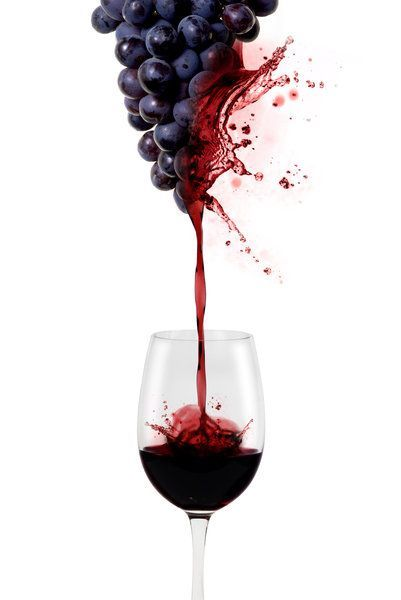

# Wine

Wine is an alcoholic drink typically made from fermented grapes. Yeast consumes the sugar in the grapes and converts it to ethanol, carbon dioxide, and heat. 

Different varieties of grapes and strains of yeasts produce different styles of wine. These variations result from the complex interactions between the biochemical development of the grape, the reactions involved in fermentation, the grape's growing environment and the production process.

### Fixed acidity, 
* Fixed acids include tartaric, malic, citric, and succinic acids which are found in grapes (except succinic). Acids are one of the fundamental properties of wine and contribute greatly to the taste of the wine, Acidity in food and drink tastes tart and zesty. Tasting acidity is also sometimes confused with alcohol. Wines with higher acidity feel lighter-bodied because they come across as “spritzy”. Reducing acids significantly might lead to wines tasting flat. If you prefer a wine that is richer and rounder, you enjoy slightly less acidity.

### Volatile acidity,
* These acids are to be distilled out from the wine before completing the production process. It is primarily constituted of acetic acid though other acids like lactic, formic and butyric acids might also be present. Excess of volatile acids are undesirable and lead to unpleasant flavour.

### Citric acid,
* This is one of the fixed acids which gives a wine its freshness. Usually most of it is consumed during the fermentation process and sometimes it is added separately to give the wine more freshness.

### Residual sugar, 
* This typically refers to the natural sugar from grapes which remains after the fermentation process stops, or is stopped.

### Chlorides,
* Chloride concentration in the wine is influenced by terroir and its highest levels are found in wines coming from countries where irrigation is carried out using salty water or in areas with brackish terrains.

### Free sulfur dioxide, 
* This is the part of the sulphur dioxide that when added to a wine is said to be free after the remaining part binds. Winemakers will always try to get the highest proportion of free sulphur to bind. They are also known as sulfites and too much of it is undesirable and gives a pungent odour.

### Total sulfur dioxide, 
* This is the sum total of the bound and the free sulfur dioxide. This is mainly added to kill harmful bacteria and preserve quality and freshness. There are usually legal limits for sulfur levels in wines and excess of it can even kill good yeast and give out undesirable odour.

### Density, 
* This can be represented as a comparison of the weight of a specific volume of wine to an equivalent volume of water. It is generally used as a measure of the conversion of sugar to alcohol.

### pH, 
* Also known as the potential of hydrogen, this is a numeric scale to specify the acidity or basicity the wine. Fixed acidity contributes the most towards the pH of wines. You might know, solutions with a pH less than 7 are acidic, while solutions with a pH greater than 7 are basic. With a pH of 7, pure water is neutral. Most wines have a pH between 2.9 and 3.9 and are therefore acidic.

### Sulphates, 
* These are mineral salts containing sulfur. Sulphates are to wine as gluten is to food. They are a regular part of the winemaking around the world and are considered essential. They are connected to the fermentation process and affects the wine aroma and flavour.

### Alcohol, 
* It's usually measured in % vol or alcohol by volume (ABV).

### Quality,
* Wine experts graded the wine quality between 0 (very bad) and 10 (very excellent). The eventual quality score is the median of at least three evaluations made by the same wine experts.

In [1]:
# Library

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(42)

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

#Path
path = '/home/mikevelazko/Escritorio/Datasets_kaggle/Wine'

In [2]:
# =======================================================================
# =======================================================================
# Functions

def load_data(filename, path = path):
    csv_path = os.path.join(path, filename)
    return pd.read_csv(csv_path)

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

### Load the data

In [3]:
df_wine = load_data("wine_quality.csv")
df_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Explore the data

In [4]:
# As we can see all the data are nmerical values
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed_acidity           1599 non-null float64
volatile_acidity        1599 non-null float64
citric_acid             1599 non-null float64
residual_sugar          1599 non-null float64
chlorides               1599 non-null float64
free_sulfur_dioxide     1599 non-null float64
total_sulfur_dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# The are 6 classes of quality wine where the nearest to 10 is the best

df_wine["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [6]:
df_wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Is there a correlation amog the variables that define the quality of a wine

In [7]:
corr_matrix = df_wine.corr()
corr_matrix["quality"].sort_values(ascending = False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur_dioxide   -0.185100
volatile_acidity       -0.390558
Name: quality, dtype: float64

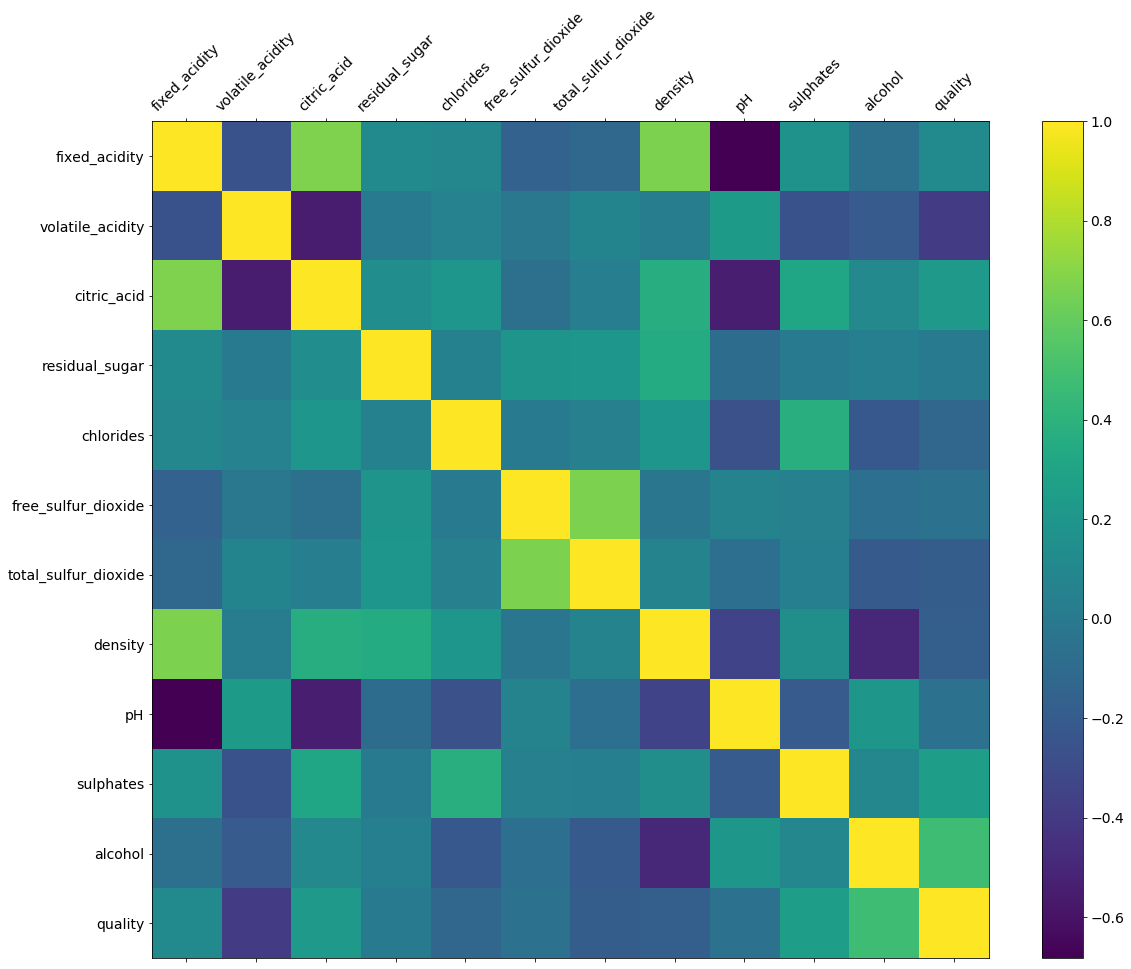

In [8]:
f = plt.figure(figsize=(19, 15))
plt.matshow(corr_matrix, fignum=f.number)
plt.xticks(range(corr_matrix.shape[1]), corr_matrix.columns, fontsize=14, rotation=45)
plt.yticks(range(corr_matrix.shape[1]), corr_matrix.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

# Exploring the distribution for each variable

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ed33ef198>,
      dtype=object)

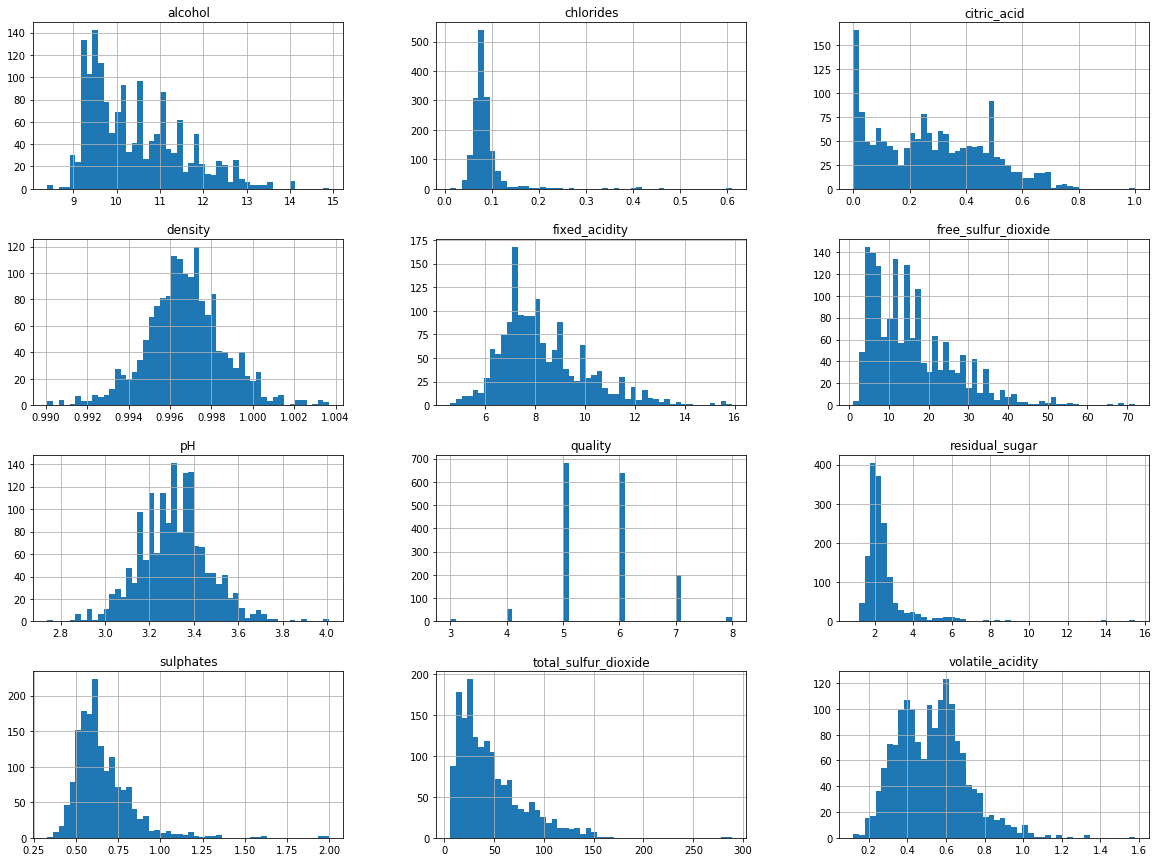

In [9]:
df_wine.hist(bins = 50, figsize = (20,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ed564e438>,
      dtype=object)

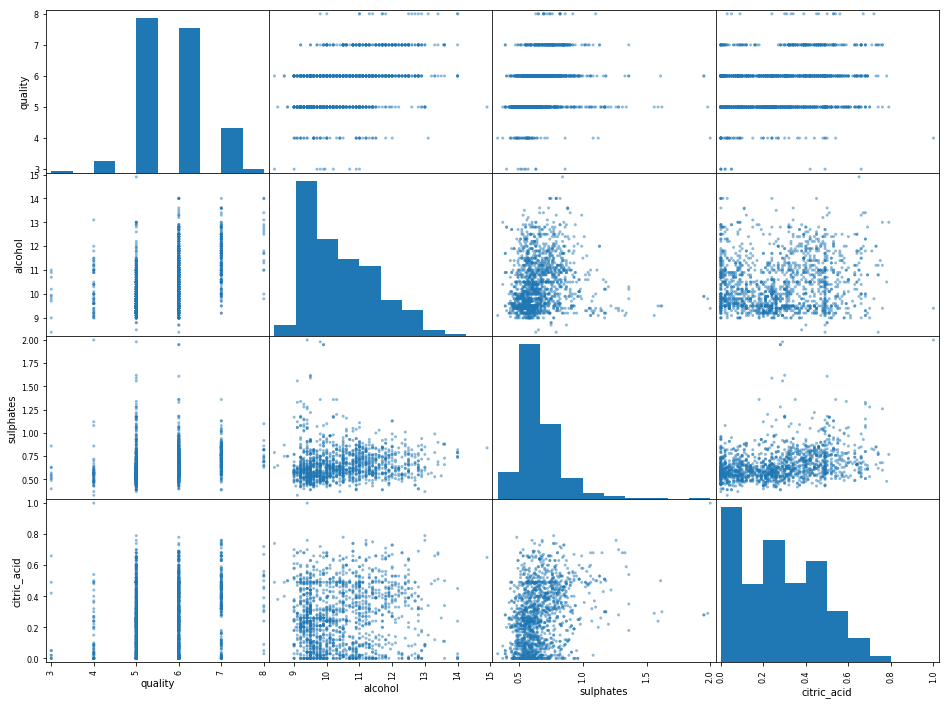

In [10]:
from pandas.plotting import scatter_matrix

attributes = ["quality", "alcohol", "sulphates", "citric_acid"]
scatter_matrix(df_wine[attributes], figsize = (16, 12))

In [11]:
# The data set does not split in train & test dataset
# We'll take 1/3 of the entire data set to create our test set

df_train, df_test = train_test_split(df_wine, test_size = 1/3, random_state = 42)
print(len(df_wine), "total")
print(len(df_train), "train +", len(df_test),"test")

1599 total
1066 train + 533 test


In [12]:
# Once we have our train & test set, We'll check if our dataset contain null values

df_wine.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
X_train = df_train.drop(["quality"], axis = 1)
y_train = df_train["quality"]

In [14]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y = None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names]

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

try:
    from sklearn.impute import SimpleImputer
    
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

preprocess_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

# when you have nulll values you can try with a imputer in order to fill them

#preprocess_pipeline = Pipeline([
#    ('imputer', SimpleImputer(strategy = "median")),
#    ('std_scaler', StandardScaler()),
#])

In [16]:
X_train_prepared = preprocess_pipeline.fit_transform(X_train)
X_train_prepared

array([[-0.29377973, -0.18293925, -0.76486812, ..., -0.22511424,
         1.22191663, -0.57853942],
       [-0.35252466,  0.43893222, -0.45786489, ..., -0.16029204,
        -0.33880071, -0.20197217],
       [ 0.70488399,  0.0997296 ,  1.99816096, ..., -0.93815841,
         0.06582971, -0.76682305],
       ...,
       [-0.64624928,  0.495466  , -1.07187135, ...,  1.26579631,
        -0.68562678, -0.86096486],
       [-0.23503481, -1.87895237,  0.4119776 , ...,  0.03417455,
         0.81728621,  1.39843867],
       [-1.46867823, -1.37014843, -0.04852725, ...,  0.48792994,
        -0.68562678,  2.90470769]])

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest_clf = RandomForestClassifier(n_estimators = 100, max_features = 4, random_state = 42)
forest_clf.fit(X_train_prepared, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [18]:
X_test = df_test.drop("quality", axis = 1)
y_test = df_test["quality"]

X_test_prepared = preprocess_pipeline.fit_transform(X_test)
X_test_prepared

array([[-0.36312273,  0.22565906, -1.00339114, ..., -0.41422602,
         0.01712649, -0.78395555],
       [-0.30799757, -0.10251633, -0.53780134, ...,  0.55838397,
        -1.09308659, -0.87729819],
       [ 1.29063187,  0.82731393, -0.27914035, ..., -0.15486335,
         1.99083864, -0.50392765],
       ...,
       [-0.96949941,  0.60853034, -1.41724873, ..., -0.67358868,
        -1.27812211, -0.87729819],
       [ 1.45600733, -1.19643427,  1.58321883, ...,  0.03965864,
         1.37405359,  0.05612817],
       [ 0.02275335,  1.23753316, -0.84819454, ..., -0.73842935,
         1.00398256, -0.78395555]])

In [19]:
forest_scores = cross_val_score(forest_clf, X_test_prepared, y_test, cv = 11)
forest_scores.mean()

/home/mikevelazko/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=11.
  % (min_groups, self.n_splits)), Warning)


0.6181919929410387

## Results

* At the final we have an accurancy of 62 %